<a href="https://colab.research.google.com/github/ravi-3690/ML-WORKSHOP-PROJECTS/blob/main/heart_disease_prediction(day5).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report
from sklearn.impute import SimpleImputer


In [ ]:
#Load data
df = pd.read_csv('heart_disease.csv')

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1.0,3,145.0,233,1,0,150.0,0,2.3,0.0,0,1,1
1,37,1.0,2,130.0,250,0,1,187.0,0,3.5,0.0,0,2,1
2,41,0.0,1,130.0,204,0,0,172.0,0,1.4,2.0,0,2,1
3,56,1.0,1,120.0,236,0,1,178.0,0,0.8,2.0,0,2,1
4,57,0.0,0,120.0,354,0,1,163.0,1,0.6,2.0,0,2,1


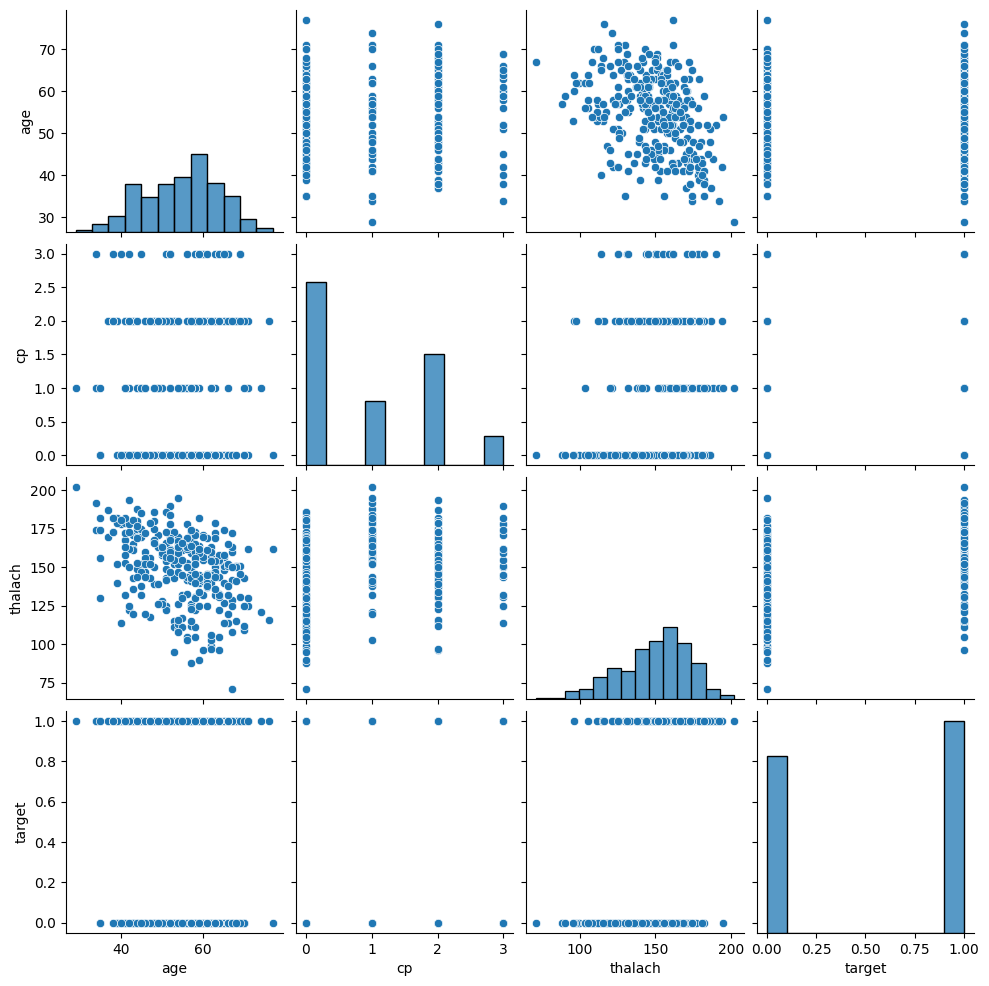

In [ ]:
#EDA (basic)
df.describe()
sns.pairplot(df[['age','cp','thalach','target']])
plt.show()

In [ ]:
#Features and target selection
X = df[['age','cp','thalach']]
y = df['target']

In [ ]:
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)


In [ ]:
#split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
#prediction and performance matrix
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:,1]

In [ ]:
y_pred

array([0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0])

In [ ]:
#user input function for prediction
def predict_heart_disease():
  age = int(input("Enter age:"))
  cp = int(input("Enter chest pain type (0-3): "))
  thalach = int(input("Enter maximum heart rate achieved: "))
  user_data = pd.DataFrame([[age, cp, thalach]], columns=['age','cp','thalach'])
  prediction = model.predict(user_data)
  result = "Heart Disease Present" if prediction[0] == 1 else "No Heart Disease"
  print(f"Prediction: {result}")


In [ ]:
#call the user input function to test
predict_heart_disease()

Enter age:12
Enter chest pain type (0-3): 1
Enter maximum heart rate achieved: 121
Prediction: Heart Disease Present


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8032786885245902
